In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import prince

In [2]:
plots_path = './plots/'

In [3]:
df = pd.read_csv('swiggy-preprocessed.csv', index_col=[0])

In [4]:
df.head()

,name,city,rating,rating_count,cost,lic_no,link,address,menu,sub_area,area,cuisine1,cuisine2
id,,,,,,,,,,,,,
567335,AB FOODS POINT,Abohar,0.0,Too Few Ratings,200.0,22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,Abohar,Abohar,Beverages,Pizzas
531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,Abohar,Abohar,Sweets,Bakery
158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Abohar,Abohar,Beverages,Beverages
187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,Abohar,Abohar,Fast Food,Indian
543530,GRILL MASTERS,Abohar,0.0,Too Few Ratings,250.0,12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,Abohar,Abohar,Italian-American,Fast Food


In [5]:
cat_vars = ['sub_area', 'area', 'cuisine1', 'cuisine2', 'rating_count', 'city']
num_vars = ['rating', 'cost']

df = df[cat_vars + num_vars]

In [6]:
# Calculate the mean rating for each combination of 'sub_area', 'area', 'city', 'cuisine1', 'cuisine2'
mean_ratings = df.groupby(['sub_area', 'area', 'city', 'cuisine1', 'cuisine2'])['rating'].mean()

# Define a function to replace 0 rating with the mean for its corresponding combination of 'sub_area', 'area', 'city', 'cuisine1', 'cuisine2'
def replace_rating(row):
    if row['rating'] == 0:
        return mean_ratings.loc[row['sub_area'], row['area'], row['city'], row['cuisine1'], row['cuisine2']]
    else:
        return row['rating']

# Apply the function to the 'rating' column
df['rating'] = df.apply(replace_rating, axis=1)

In [7]:
le = LabelEncoder()

In [8]:
# Encode the categorical variables using LabelEncoder
for col in cat_vars:
    df[col] = le.fit_transform(df[col])

In [9]:
df

,sub_area,area,cuisine1,cuisine2,rating_count,city,rating,cost
id,,,,,,,,
567335,1,3,12,72,7,0,0.0,200.0
531342,1,3,88,8,4,0,4.4,200.0
158203,1,3,12,11,0,0,3.8,100.0
187912,1,3,27,39,3,0,3.7,250.0
543530,1,3,43,26,7,0,0.0,250.0
...,...,...,...,...,...,...,...,...
553122,815,815,27,81,7,551,0.0,200.0
562647,815,815,73,72,7,551,1.4,300.0
559435,815,815,27,81,7,551,0.0,300.0


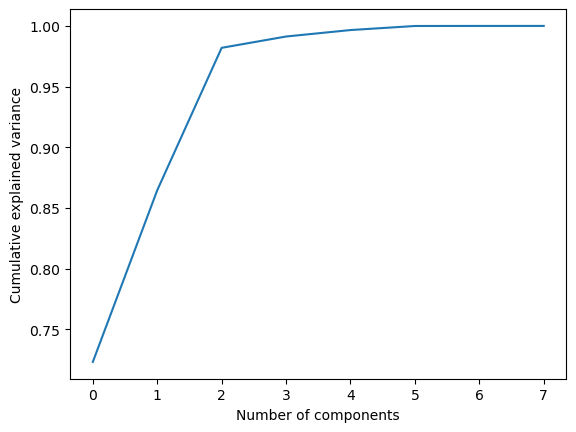

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# your data
X = df.values

# fit PCA
pca = PCA().fit(X)

# scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig(plots_path + 'number-of-comp.png', bbox_inches='tight')
plt.show()

In [11]:
mca = prince.MCA(n_components=2)
mca.fit(df)

In [12]:
def elbow_kmeans(df):
    # Determine optimal number of clusters using WCSS
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.savefig(plots_path + 'elbow-method.png', bbox_inches='tight')
    plt.show()

In [13]:
reduced_df = df[['sub_area', 'area' , 'cuisine1' , 'rating', 'cost']]

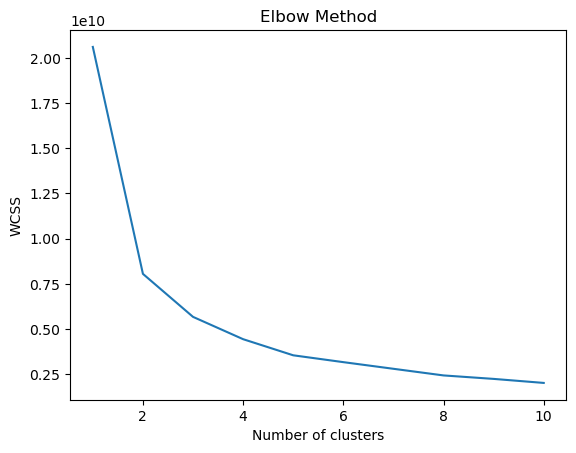

In [14]:
elbow_kmeans(reduced_df)

In [15]:
mca.__dict__

{'n_components': 2,
 'n_iter': 10,
 'copy': True,
 'check_input': True,
 'random_state': None,
 'engine': 'sklearn',
 'K_': 8,
 'J_': 8,
 'row_masses_': 567335    1.405308e-06
 531342    1.469142e-06
 158203    6.230993e-07
 187912    1.556319e-06
 543530    1.572039e-06
               ...     
 553122    1.189033e-05
 562647    1.254964e-05
 559435    1.236671e-05
 418989    1.183793e-05
 447770    1.207326e-05
 Length: 145814, dtype: float64,
 'col_masses_': sub_area        0.289151
 area            0.287300
 cuisine1        0.029025
 cuisine2        0.029180
 rating_count    0.003514
 city            0.164372
 rating          0.001427
 cost            0.196030
 dtype: float64,
 'active_rows_': Int64Index([567335, 531342, 158203, 187912, 543530, 158204, 156588, 244866,
             156602, 158193,
             ...
             378059, 529034, 185296, 561381, 214210, 553122, 562647, 559435,
             418989, 447770],
            dtype='int64', length=145814),
 'active_cols_': Index

In [16]:
# Get the row and column coordinates
row_coords = mca.row_coordinates(df)
col_coords = mca.column_coordinates(df)

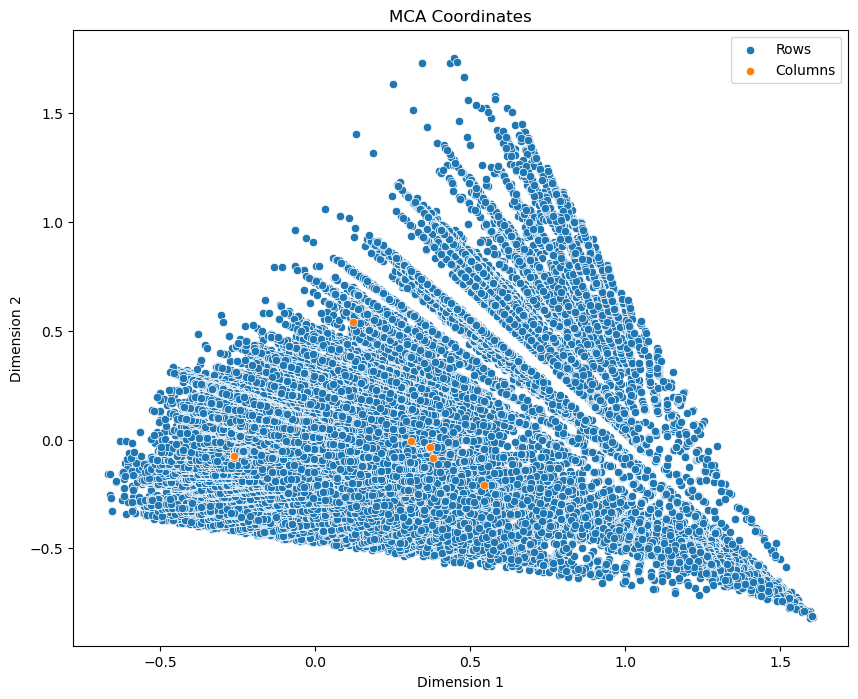

In [17]:
# Plot the row and column coordinates
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=row_coords[0], y=row_coords[1], ax=ax)
sns.scatterplot(x=col_coords[0], y=col_coords[1], ax=ax)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.legend(['Rows', 'Columns'])
ax.set_title('MCA Coordinates')
plt.savefig(plots_path + 'mca-cordinates.png', bbox_inches='tight')
plt.show()

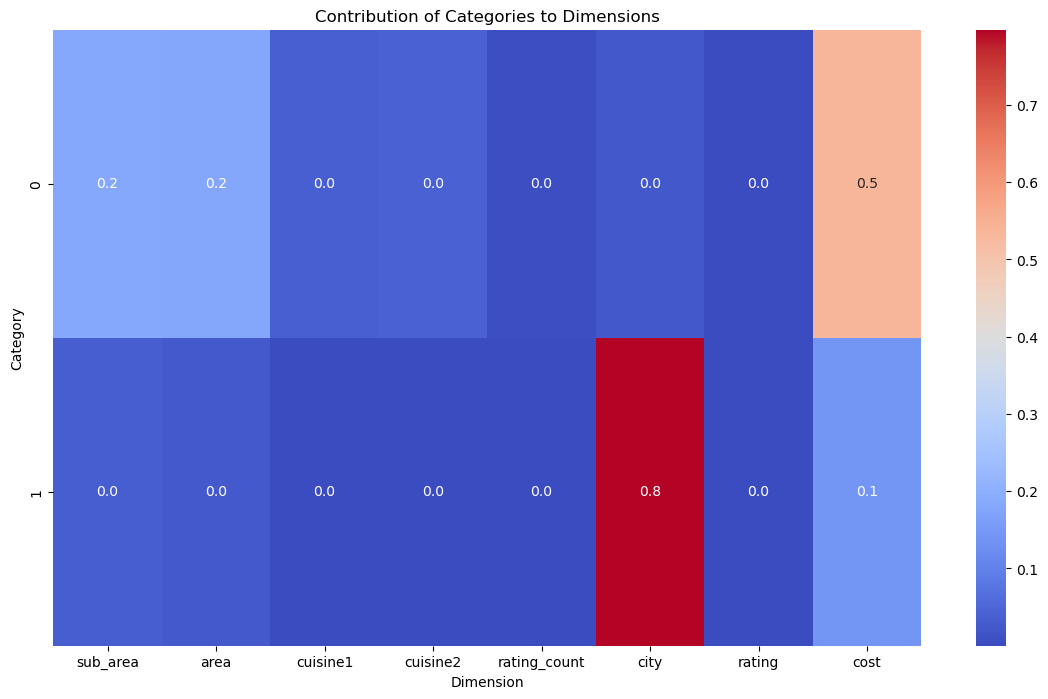

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(mca.column_contributions_.T, cmap='coolwarm', ax=ax, annot=True, fmt='.1f')
ax.set_xlabel('Dimension')
ax.set_ylabel('Category')
ax.set_xticklabels(df.columns)
ax.set_title('Contribution of Categories to Dimensions')
plt.savefig(plots_path + 'contribution-of-cat.png', bbox_inches='tight')
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(row_coords)
df['cluster'] = kmeans.labels_

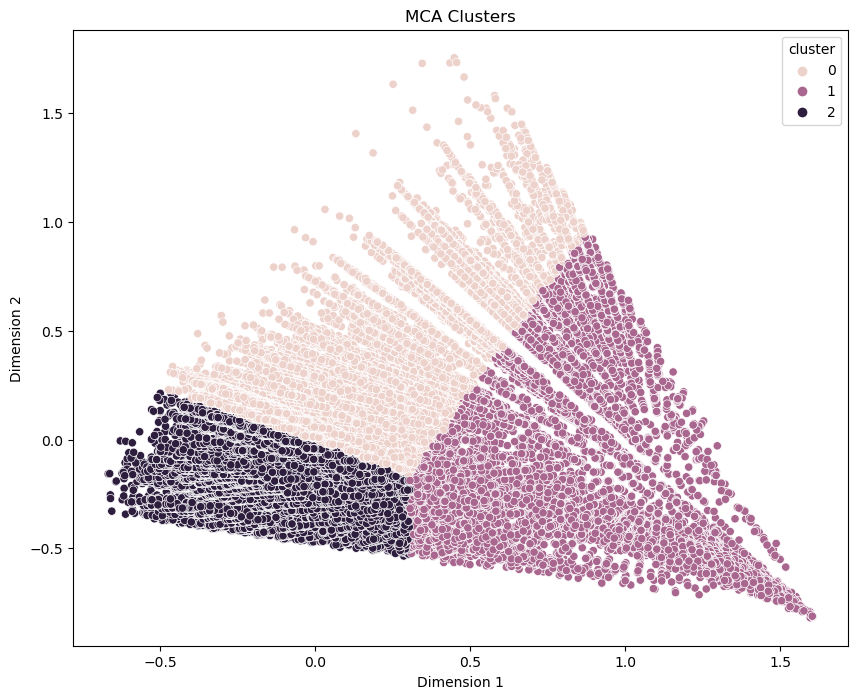

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=row_coords[0], y=row_coords[1], hue=df['cluster'], ax=ax)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('MCA Clusters')
plt.savefig(plots_path + 'mca-clusters.png', bbox_inches='tight')
plt.show()

In [21]:
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

           sub_area        area   cuisine1   cuisine2  rating_count  \
cluster                                                               
0        421.198369  418.587938  42.001692  41.971998      5.058635   
1        119.039367  119.875027  43.136712  43.632059      4.858314   
2        567.280576  562.701647  40.803487  41.194262      5.166386   

               city    rating        cost  
cluster                                    
0        345.384507  2.004475  246.375413  
1        126.862358  2.234188  373.084604  
2        160.972048  2.021925  278.240085  


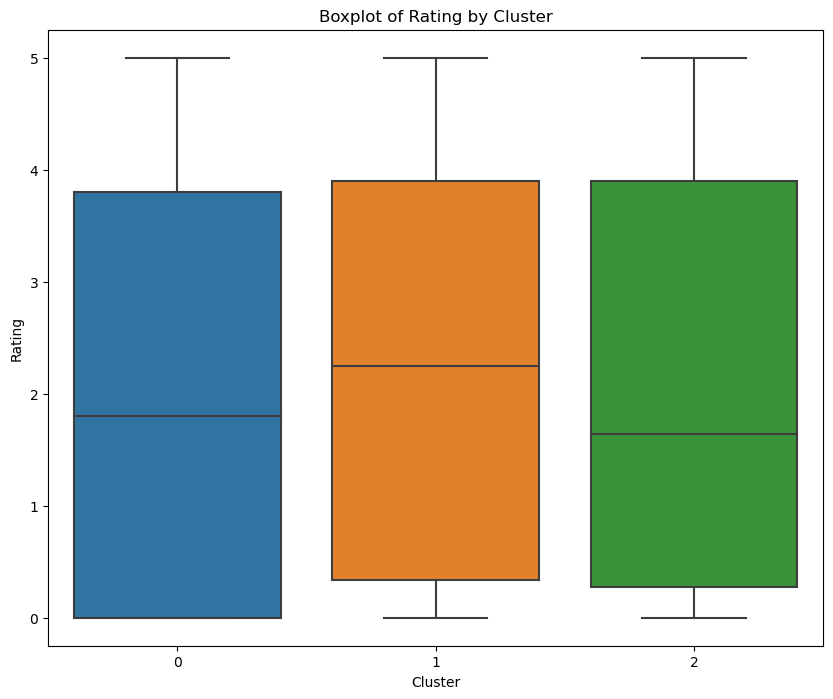

In [22]:
# Example: Boxplot of rating by cluster
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='cluster', y='rating', data=df, ax=ax)
ax.set_xlabel('Cluster')
ax.set_ylabel('Rating')
ax.set_title('Boxplot of Rating by Cluster')
plt.savefig(plots_path + 'rating-by-cluster.png', bbox_inches='tight')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(row_coords, df['cluster'])

0.32317602711857785

The silhouette score measures the goodness of clustering based on the distance between points within the same cluster compared to the distance between points in different clusters. It ranges from -1 to 1, where a score close to 1 indicates that the clustering is good, while a score close to -1 indicates that the clustering is poor. Therefore, a higher silhouette score means better clustering.

In summary, silhouette score provide a measure of how well the data points are clustered. Higher scores indicate better clustering.